In [1]:
import csv
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time

huyen = [f"0{x}" if x < 10 else f"{x}" for x in range(2, 24)]
sbd_list = [876, 499, 845, 456, 333, 813, 806, 785, 734, 827, 870, 1006, 841, 604, 319, 772, 734, 634, 651, 647, 787, 500]

def getSBD(huyen, sbd):
    if (sbd < 10):
        return f"{huyen}000{sbd}"
    elif (sbd < 100):
        return f"{huyen}00{sbd}"
    elif (sbd < 1000):
        return f"{huyen}0{sbd}"
    else:
        return f"{huyen}{sbd}"


chrome_options = Options()
chrome_options.add_argument("--incognito")
chrome_options.add_argument("--window-size=1920x1080")
driver = webdriver.Chrome(options=chrome_options)
url = "http://bacninh.edu.vn/diem-thi-2022"

header = ['Số báo danh', 'Họ và tên', 'Ngày sinh', 'Trường', 'Điểm Khuyến khích', 'Ngữ Văn', 'Tiếng Anh', 'Toán Tự Luận',
          'Toán Trắc Nghiệm', 'Tổng toán', 'Môn Chuyên', 'Tổng Chuyên', 'Tổng đại trà']
employee_file = open('diem-thi.csv', mode='w',
                     encoding='utf-8-sig', newline='')
employee_writer = csv.writer(employee_file)
employee_writer.writerow(header)

driver.get(url)
time.sleep(2)

for x in range(0, 22):
    for i in range(sbd_list[x]):
        sbd_field = driver.find_element(
            By.CSS_SELECTOR, 
            "#searchForm15 > input.search_init.text_filter.form-control.wp-100")
        sbd_field.send_keys(getSBD( huyen[x], i + 1))
        driver.find_element(By.CSS_SELECTOR, '#searchForm15 > button').click()
        row = []
        for index in range(13):
            try:
                sbd = driver.find_element(
                    By.CSS_SELECTOR, 
                    f'#module1015 > div.cont-dataset-detail > div.table-responsive > table > tbody > tr > td:nth-child({index + 1})')
                row.append(sbd.text)
            except:
                try:
                    sbd = driver.find_element(
                       By.CSS_SELECTOR, 
                       f'#module1015 > div.cont-dataset-detail > div.table-responsive > table > tbody > tr > td:nth-child({index + 1})')
                    row.append(sbd.text)
                except: 
                    row.append("")
                    print(f"error at {getSBD(huyen[x], i + 1)} with field {index + 1}")
        employee_writer.writerow(row)
        sbd_field.clear()

employee_file.close()


error at 020801 with field 1
error at 020863 with field 13
error at 030409 with field 3
error at 040451 with field 11
error at 050439 with field 13
error at 090201 with field 12
error at 090236 with field 5
error at 090375 with field 3
error at 120670 with field 8
error at 140786 with field 6
error at 190435 with field 6
error at 200630 with field 5


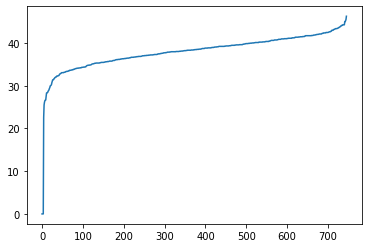

Số người trên 40.1 (điểm thường) : 215


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


dataframe = pd.read_csv("diem-thi.csv")
dataframe = dataframe.sort_values("Tổng đại trà")
dataframe = dataframe[dataframe['Trường'] == 'THPT HÀN THUYÊN']
tdt = dataframe.get("Tổng đại trà")
tdt = list(filter(lambda x: (x != '' and x != '.'), tdt))
y = [float(x) for x in tdt]
x = np.arange(0, len(y))
    
plt.plot(x, y)

plt.show()

print(f"Số người trên 40.1 (điểm thường) : {len([1 for i in y if i > 40.1])}")

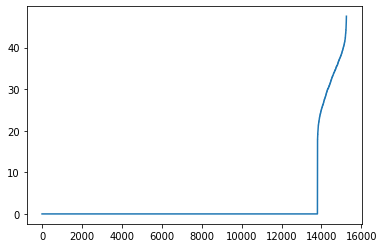

Số người trên 34.3 điểm chuyên : 590


In [10]:
dataframe = pd.read_csv("diem-thi.csv")
dataframe = dataframe.sort_values("Tổng Chuyên")
tdt = dataframe.get("Tổng Chuyên")
tdt = list(filter(lambda x: (x != '' and x != '.'), tdt))
y = [float(x) for x in tdt]
x = np.arange(0, len(y))
plt.plot(x, y)
plt.show() 
print(f"Số người trên 34.3 điểm chuyên : {len([1 for i in y if i > 34.3])}")